# **Video Anomaly Detection with OpenCV and TensorFlow**

# **Install Library**

In [6]:
!pip install opencv-python-headless
!pip install tensorflow
!pip install object_detection

# **Import Library**

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from object_detection.utils import visualization_utils as vis_util


# **Load Pre Trained Model Faster R-CNN Inception v2**

In [ ]:
import tensorflow as tf

def load_tf_model(model_path):
    model = tf.saved_model.load(model_path)
    return model

model_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_coco_2018_01_28/saved_model"
model = load_tf_model(model_path)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Function to load TensorFlow model
def load_tf_model(model_path):
    model = tf.saved_model.load(model_path)
    return model

# Load TensorFlow model
model_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_coco_2018_01_28/saved_model"
model = load_tf_model(model_path)

# Path to the video file
video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4"

# Open the video capture
cap = cv2.VideoCapture(video_path)

# Loop over all frames in the video stream
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame if necessary (e.g., resize, convert to RGB)
    # Perform object detection on the frame
    # Draw bounding boxes around detected objects

    # Display the frame with bounding boxes
    cv2_imshow(frame)

    # Check for key press to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Find Total Number of box detected and there Index**




In [ ]:
"""
 This script performs object detection using a TensorFlow model (Faster R-CNN Inception v2) on each frame of a video stream.
It detects objects with confidence scores greater than 0.5 and draws bounding boxes around them.
 The total number of detected objects and the frames where objects are detected are displayed.
"""
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Function to load TensorFlow model
def load_tf_model(model_path):
    model = tf.saved_model.load(model_path)
    return model

# Function to perform object detection on a frame
def perform_object_detection(frame, model, frame_number):
    # Preprocess the frame if necessary
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(rgb_frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform object detection
    detections = model.signatures["serving_default"](input_tensor)

    # Extract bounding boxes from detections
    boxes = detections['detection_boxes'][0].numpy()
    scores = detections['detection_scores'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(np.int32)

    # Draw bounding boxes on the frame
    num_boxes = 0
    for i in range(len(boxes)):
        if scores[i] > 0.5:  # Filter out low-confidence detections
            num_boxes += 1
            ymin, xmin, ymax, xmax = boxes[i]
            xmin = int(xmin * frame.shape[1])
            xmax = int(xmax * frame.shape[1])
            ymin = int(ymin * frame.shape[0])
            ymax = int(ymax * frame.shape[0])
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(frame, f'Object {classes[i]}: {scores[i]}', (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame, num_boxes, frame_number


# Load the TensorFlow model
model_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_coco_2018_01_28/saved_model"  # Replace with the path to your TensorFlow model
model = load_tf_model(model_path)

# Path to the video file
video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4"

# Open the video capture
cap = cv2.VideoCapture(video_path)

# Loop over all frames in the video stream
total_boxes_detected = 0
detected_frames = []
frame_number = 0
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    frame_number += 1
    if not ret:
        break

    # Perform object detection on the frame
    frame_with_boxes, num_boxes, frame_number = perform_object_detection(frame, model, frame_number)

    # Accumulate the total number of boxes detected
    total_boxes_detected += num_boxes

    # Display the frame with bounding boxes
    cv2_imshow(frame_with_boxes)

    # Check if boxes are detected in this frame and add frame number to the list
    if num_boxes > 0:
        detected_frames.append(frame_number)

    # Check for key press to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Print the total number of boxes detected
print("Total number of boxes detected:", total_boxes_detected)

# Print the frame numbers where boxes are detected
print("Frames with boxes detected:", detected_frames)


Output hidden; open in https://colab.research.google.com to view.

# **Finding the Anomaly Scores**

In [ ]:
# Total number of frames
total_frames = 572

# Frames with boxes detected
frames_with_boxes_detected = [257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 287, 288, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 311, 312, 313, 314, 319, 320, 331, 332, 333, 334, 335, 336, 337, 338, 341, 342, 347, 348, 349, 350, 351, 352]

# Initialize anomaly scores with zeros for all frames
anomaly_scores = [0] * total_frames

# Mark frames with boxes detected as anomalies
for frame_num in frames_with_boxes_detected:
    anomaly_scores[frame_num] = 1

# Print the total number of frames and the anomaly scores
print("Total frames:", total_frames)
print("Anomaly Scores:", anomaly_scores)


Total frames: 572
Anomaly Scores: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,

# **Ploting & Finding Anomaly detected at index**

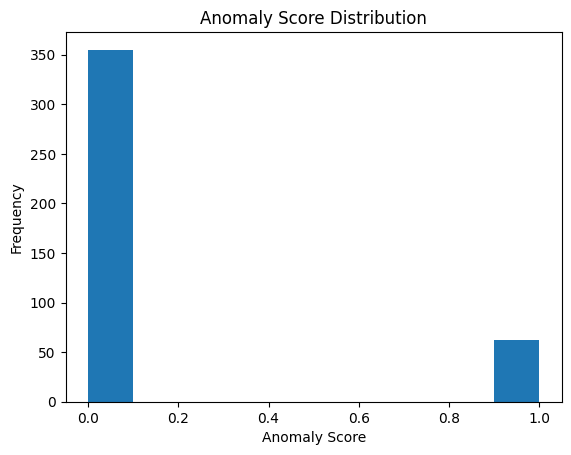

Anomaly detected at index 299, with score: 1
Anomaly detected at index 300, with score: 1
Anomaly detected at index 301, with score: 1
Anomaly detected at index 302, with score: 1
Anomaly detected at index 303, with score: 1
Anomaly detected at index 304, with score: 1
Anomaly detected at index 305, with score: 1
Anomaly detected at index 306, with score: 1
Anomaly detected at index 307, with score: 1
Anomaly detected at index 308, with score: 1
Anomaly detected at index 309, with score: 1
Anomaly detected at index 310, with score: 1
Anomaly detected at index 315, with score: 1
Anomaly detected at index 316, with score: 1
Anomaly detected at index 317, with score: 1
Anomaly detected at index 318, with score: 1
Anomaly detected at index 319, with score: 1
Anomaly detected at index 320, with score: 1
Anomaly detected at index 321, with score: 1
Anomaly detected at index 322, with score: 1
Anomaly detected at index 323, with score: 1
Anomaly detected at index 324, with score: 1
Anomaly de

In [ ]:
import matplotlib.pyplot as plt

# Anomaly scores
anomaly_scores = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Analyze Anomaly Score Distribution
plt.hist(anomaly_scores, bins=10)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.show()

# Define Thresholds for Anomaly Scores
normal_threshold = 0.6
anomaly_threshold = 0.8

# Trigger Alerts for Anomalies
for i, score in enumerate(anomaly_scores):
    if score >= anomaly_threshold:
        print(f"Anomaly detected at index {i}, with score: {score}")


# **Detect the Object in the video**

In [ ]:
import cv2
import tensorflow as tf
from PIL import Image
from IPython.display import display

class VideoApp:
    def __init__(self, video_source=0, model_path=None):
        self.video_source = video_source
        self.vid = cv2.VideoCapture(self.video_source)

        # Load TensorFlow model for object detection
        if model_path:
            self.model = tf.saved_model.load(model_path)
        else:
            self.model = None

        self.update()

    def update(self):
        while self.vid.isOpened():  # Keep reading frames until no more frames are available
            ret, frame = self.vid.read()
            if not ret:
                break

            # Process frame
            processed_frame, anomaly_detected = self.process_frame(frame)

            # Save processed frame as image
            cv2.imwrite('processed_frame.jpg', processed_frame)

            # Display processed frame with anomaly indicator
            if anomaly_detected:
                display(Image.open('processed_frame.jpg').resize((640, 480)))
            else:
                display(Image.open('processed_frame.jpg'))

        self.vid.release()

    def process_frame(self, frame):
        # Placeholder for processing frame
        # Perform object detection and anomaly detection

        anomaly_detected = False

        # Example: Object detection
        if self.model:
            # Preprocess frame for object detection
            input_tensor = tf.convert_to_tensor(frame)
            input_tensor = input_tensor[tf.newaxis, ...]

            # Perform inference
            detections = self.model.signatures["serving_default"](input_tensor)

            # Extract information from detections and draw bounding boxes
            # Adjust this part according to the structure of your loaded model
            for i in range(detections['detection_boxes'].shape[1]):
                confidence = detections['detection_scores'][0, i].numpy()
                if confidence > 0.5:  # Confidence threshold
                    box = detections['detection_boxes'][0, i].numpy()
                    ymin, xmin, ymax, xmax = box
                    h, w, _ = frame.shape
                    x1, y1, x2, y2 = int(xmin * w), int(ymin * h), int(xmax * w), int(ymax * h)
                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    cv2.putText(frame, 'Object Detected', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Example: Anomaly detection
        # Placeholder code for anomaly detection based on object detection results
        if detections['detection_boxes'].shape[1] > 0:
            anomaly_detected = True

        return frame, anomaly_detected

# Run the application
app = VideoApp(video_source="/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4",
               model_path="/content/drive/MyDrive/Colab Notebooks/save AI models/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_coco_2018_01_28/saved_model")


Output hidden; open in https://colab.research.google.com to view.

# **Object Detection in Video using TensorFlow and OpenCV with Values**

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Function to load TensorFlow model
def load_tf_model(model_path):
    model = tf.saved_model.load(model_path)
    return model

# Function to perform object detection on a frame
def perform_object_detection(frame, model):
    # Preprocess the frame if necessary
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(rgb_frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform object detection
    detections = model.signatures["serving_default"](input_tensor)

    # Extract bounding boxes from detections
    boxes = detections['detection_boxes'][0].numpy()
    scores = detections['detection_scores'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(np.int32)

    # Draw bounding boxes on the frame
    for i in range(len(boxes)):
        if scores[i] > 0.5:  # Filter out low-confidence detections
            ymin, xmin, ymax, xmax = boxes[i]
            xmin = int(xmin * frame.shape[1])
            xmax = int(xmax * frame.shape[1])
            ymin = int(ymin * frame.shape[0])
            ymax = int(ymax * frame.shape[0])
            cv2.rectangle(frame, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
            cv2.putText(frame, f'Object {classes[i]}: {scores[i]}', (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return frame



# Load the TensorFlow model
model = load_tf_model(model_path)

# Path to the video file
video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4"

# Open the video capture
cap = cv2.VideoCapture(video_path)

# Loop over all frames in the video stream
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame
    frame_with_boxes = perform_object_detection(frame, model)

    # Display the frame with bounding boxes
    cv2_imshow(frame_with_boxes)

    # Check for key press to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()


Output hidden; open in https://colab.research.google.com to view.

# **Background Subtraction in Video Stream**

In [ ]:
"""
This script performs background subtraction on each frame of a video stream using the
Gaussian Mixture-based Background/Foreground Segmentation method (MOG2).
It subtracts the background from the current frame to highlight moving objects.
The resulting foreground mask is displayed in real-time using OpenCV's imshow function.
"""

from google.colab.patches import cv2_imshow
import cv2

# Open the video capture
cap = cv2.VideoCapture("/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4")

# Initialize background subtractor
fgbg = cv2.createBackgroundSubtractorMOG2()

# Loop over all frames in the video stream
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Apply background subtraction
    fgmask = fgbg.apply(frame)

    # Display the background subtracted frame
    cv2_imshow(fgmask)

    # Check for key press to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture
cap.release()


Output hidden; open in https://colab.research.google.com to view.

# **Number of Anomaly Detection in Shark Video using Optical Flow**

In [ ]:
import cv2
import numpy as np

# Function to compute anomaly scores for player movements
def calculate_player_movement_anomaly_scores(frames):
    anomaly_scores = []
    prev_frame_gray = cv2.cvtColor(frames[0], cv2.COLOR_BGR2GRAY)

    for frame in frames[1:]:
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Compute optical flow between consecutive frames
        flow = cv2.calcOpticalFlowFarneback(prev_frame_gray, frame_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)

        # Calculate magnitude of optical flow vectors
        magnitude = np.sqrt(flow[..., 0]**2 + flow[..., 1]**2)

        # Compute anomaly score based on average flow magnitude
        anomaly_score = np.mean(magnitude)
        anomaly_scores.append(anomaly_score)

        prev_frame_gray = frame_gray

    return anomaly_scores

# Function to detect anomalies based on threshold
def detect_anomalies(anomaly_scores, threshold):
    anomalies = [score > threshold for score in anomaly_scores]
    return anomalies

# Load basketball game video clip
video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4"
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# Read frames from video clip
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frames.append(frame)

cap.release()

# Calculate anomaly scores for player movements
player_movement_anomaly_scores = calculate_player_movement_anomaly_scores(frames)

# Set anomaly detection threshold
threshold = 0.1

# Detect anomalies based on threshold
anomalies = detect_anomalies(player_movement_anomaly_scores, threshold)

# Print the total number of frames and the number of detected anomalies
print("Total frames:", len(frames))
print("Number of anomalies detected:", sum(anomalies))


Total frames: 572
Number of anomalies detected: 287


# **Finding the Restricted Area in Video Stream**

In [ ]:

"""
Interactive Selection of Restricted Area in Video Stream

This script allows users to interactively select a restricted area in a video stream by clicking on four points.
The selected points define the coordinates and dimensions of the restricted area.

"""
import cv2
import matplotlib.pyplot as plt

# Function to get points from mouse click event
def get_points(event):
    if event.button == 1:
        x = int(event.xdata)
        y = int(event.ydata)
        points.append((x, y))
        plt.scatter(x, y, c='g', marker='o')
        plt.draw()

# Path to the video file
video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4"

# Open the video capture
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    print("Error: Unable to open video file.")
    exit()

# List to store selected points
points = []

# Add predefined points
predefined_points = [(100, 100), (100, 500), (300, 100), (300, 500)]
for point in predefined_points:
    points.append(point)
    plt.scatter(point[0], point[1], c='g', marker='o')

# Create a plot to display the video and points
plt.figure(figsize=(10, 6))
plt.title("Select 4 points to define the restricted area (click to select)")

# Set mouse event handler
plt.connect('button_press_event', get_points)

# Loop over all frames in the video
while True:
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Display the frame using matplotlib
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.pause(0.001)  # Pause to update the plot

# Close the video capture
cap.release()

# Calculate coordinates and dimensions of the restricted area
if len(points) == 4:
    x = min(points[0][0], points[1][0], points[2][0], points[3][0])
    y = min(points[0][1], points[1][1], points[2][1], points[3][1])
    width = max(points[0][0], points[1][0], points[2][0], points[3][0]) - x
    height = max(points[0][1], points[1][1], points[2][1], points[3][1]) - y
    print("Restricted area coordinates (x, y):", x, y)
    print("Restricted area dimensions (width, height):", width, height)
else:
    print("Error: Four points are required to define the restricted area.")


Output hidden; open in https://colab.research.google.com to view.

# **Final Testing Object Detection and Anomaly Detection on Shark Video Stream**

In [ ]:

"""
This section focuses on testing the object detection and anomaly detection functionalities
on a shark video stream. The code utilizes a TensorFlow model (Faster R-CNN Inception v2)
to detect objects with confidence scores above 0.5 and marks frames where sharks are detected as anomalies.
The testing process involves loading the TensorFlow model, reading frames from the video stream,
 performing object detection, displaying the video stream with bounding boxes and anomaly indicators,
and finally printing whether any anomalies, specifically shark detections, are detected.

"""


import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Function to load TensorFlow model
def load_tf_model(model_path):
    model = tf.saved_model.load(model_path)
    return model

# Function to perform object detection on a frame
def perform_object_detection(frame, model):
    # Preprocess the frame if necessary
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(rgb_frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform object detection
    detections = model.signatures["serving_default"](input_tensor)

    # Extract bounding boxes from detections
    boxes = detections['detection_boxes'][0].numpy()
    scores = detections['detection_scores'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(np.int32)

    # Filter out low-confidence detections
    threshold = 0.5
    detected_boxes = []
    for i in range(len(boxes)):
        if scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            height, width, _ = frame.shape
            x_min = int(xmin * width)
            y_min = int(ymin * height)
            x_max = int(xmax * width)
            y_max = int(ymax * height)
            detected_boxes.append((x_min, y_min, x_max, y_max))

    # Return whether a shark is detected or not
    return len(detected_boxes) > 0, detected_boxes

# Function to display the video stream with bounding boxes and anomaly indicators
def display_video_stream(frame, shark_detected):
    # Draw message if a shark is detected
    if shark_detected:
        cv2.putText(frame, 'A shark detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Display the frame
    cv2_imshow(frame)

# Load the TensorFlow model
model_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_coco_2018_01_28/saved_model"
model = load_tf_model(model_path)

# Path to the video file
video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4"

# Open the video capture
cap = cv2.VideoCapture(video_path)

# Variables to track anomaly detection
anomaly_detected = False
anomaly_type = None

# Loop over all frames in the video stream
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame
    shark_detected, shark_boxes = perform_object_detection(frame, model)

    # Display the video stream with bounding boxes and anomaly indicators
    display_video_stream(frame, shark_detected)

    # Check if anomaly is detected
    if shark_detected:
        anomaly_detected = True
        anomaly_type = "Shark"

    # Check for key press to exit
    if cv2.waitKey(25) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

# Print the result of anomaly detection
if anomaly_detected:
    print("Anomaly Detected:", anomaly_type)
else:
    print("No Anomaly Detected")


Output hidden; open in https://colab.research.google.com to view.

# **Shark Detection in Video Stream using TensorFlow and OpenCV and to Save the Video**

In [8]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Function to load TensorFlow model
def load_tf_model(model_path):
    model = tf.saved_model.load(model_path)
    return model

# Function to perform object detection on a frame
def perform_object_detection(frame, model):
    # Preprocess the frame if necessary
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    input_tensor = tf.convert_to_tensor(rgb_frame)
    input_tensor = input_tensor[tf.newaxis, ...]

    # Perform object detection
    detections = model.signatures["serving_default"](input_tensor)

    # Extract bounding boxes from detections
    boxes = detections['detection_boxes'][0].numpy()
    scores = detections['detection_scores'][0].numpy()
    classes = detections['detection_classes'][0].numpy().astype(np.int32)

    # Filter out low-confidence detections
    threshold = 0.5
    detected_boxes = []
    for i in range(len(boxes)):
        if scores[i] > threshold:
            ymin, xmin, ymax, xmax = boxes[i]
            height, width, _ = frame.shape
            x_min = int(xmin * width)
            y_min = int(ymin * height)
            x_max = int(xmax * width)
            y_max = int(ymax * height)
            detected_boxes.append((x_min, y_min, x_max, y_max))

            # Draw bounding boxes on the frame
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    return frame, len(detected_boxes) > 0

# Load the TensorFlow model
model_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/faster_rcnn_inception_v2_coco_2018_01_28/faster_rcnn_inception_v2_coco_2018_01_28/saved_model"
model = load_tf_model(model_path)

# Path to the input video file
input_video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/shark1.mp4"

# Path to the output video file with shark detection
output_video_path = "/content/drive/MyDrive/Colab Notebooks/save AI models/sharkdetection.avi"

# Open the input video capture
cap = cv2.VideoCapture(input_video_path)

# Get the video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Loop over all frames in the input video stream
while cap.isOpened():
    # Read a frame from the video
    ret, frame = cap.read()
    if not ret:
        break

    # Perform object detection on the frame
    frame_with_boxes, shark_detected = perform_object_detection(frame, model)

    # Display the frame with bounding boxes
    if shark_detected:
        cv2.putText(frame_with_boxes, 'A shark detected', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    cv2_imshow(frame_with_boxes)

    # Write the processed frame to the output video
    out.write(frame_with_boxes)

    # Check for key press to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all OpenCV windows
cap.release()
out.release()
cv2.destroyAllWindows()

print("Shark detection video saved successfully!")


Output hidden; open in https://colab.research.google.com to view.